1. Carregar i Redimensionar la Imatge

Tasca: Carrega una imatge en escala de grisos i guarda-la en una matriu numpy. Redimensiona la imatge abans de carregar-la si és massa gran, per facilitar els càlculs. Pseudocodi:

In [15]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
# 1. Carregar la imatge utilitzant Pillow
ruta_actual=os.getcwd()
imatge_path = input("Introdueix el nom de la imatge amb la seua extensió ('.jpg', '.png'): ")
imatge = Image.open(imatge_path)

# 2. Converteix la imatge a escala de grisos (opcional)
imatge_grisos = imatge.convert("L")

# 3. Converteix la imatge a una matriu numpy
img_array = np.array(imatge_grisos)

# 4. Guarda la matriu com 'img_array'
print("La matriu numpy generada:")
print(img_array)

La matriu numpy generada:
[[254 255 255 ... 254 254 254]
 [254 255 255 ... 253 253 253]
 [254 255 255 ... 253 253 253]
 ...
 [254 253 253 ... 255 255 255]
 [254 254 253 ... 255 255 255]
 [254 254 253 ... 255 255 255]]


 2. Definir els Nuclis del Filtre Sobel
Objectiu:

Els nuclis Sobel Gx i Gy s'utilitzen per detectar canvis en la intensitat de la imatge en les direccions horitzontal i vertical.

In [10]:
#Defineix els nuclis Sobel de 3x3:
Gx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
Gy = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

In [ ]:
# 5. Crear una matriu 'edges' buida amb la mateixa mida que 'img_array'
edges = np.zeros_like(img_array, dtype=np.int32)

# 6. Aplicar el filtre Sobel
for i in range(1, img_array.shape[0] - 1):
    for j in range(1, img_array.shape[1] - 1):
        # Extreu un bloc de 3x3 al voltant del píxel (i, j)
        bloc = img_array[i-1:i+2, j-1:j+2]

        # Calcula Ix i Iy
        Ix = np.sum(bloc * Gx)
        Iy = np.sum(bloc * Gy)

        # Calcula la magnitud del gradient
        edges[i, j] = np.sqrt(Ix**2 + Iy**2)

# 7. Normalitza 'edges' per ajustar els valors entre 0 i 255
edges = (edges / np.max(edges)) * 255
edges = edges.astype(np.uint8)

# 8. Mostra el resultat
print("Resultat de la matriu de detecció de vores:")
print(edges)


Resultat de la detecció de vores:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


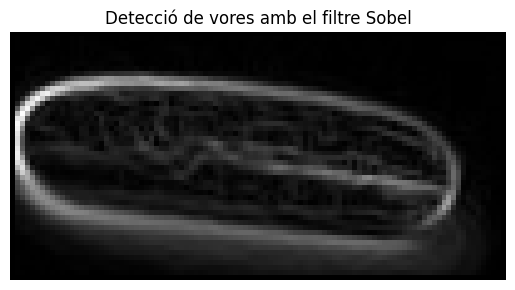

In [16]:
# 8. Mostra el resultat
plt.imshow(edges, cmap="gray")
plt.axis("off")  # Amaga els eixos
plt.title("Detecció de vores amb el filtre Sobel")
plt.show()

In [17]:
# 9. Crea una imatge amb Pillow utilitzant 'edges'
imatge_resultat = Image.fromarray(edges)

# 10. Guarda la imatge resultant
imatge_resultat.save("vores_detectades.png")